,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


None

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

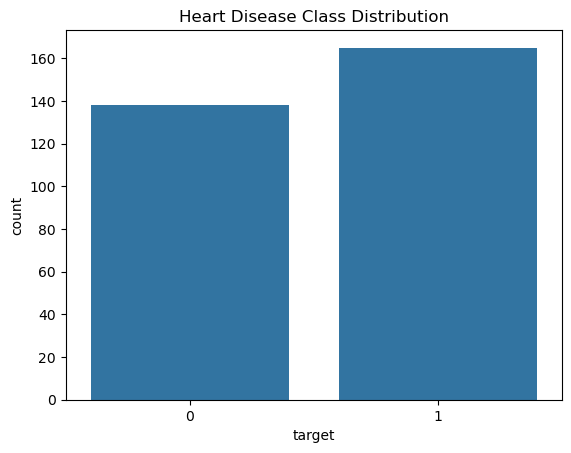

Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

Confusion Matrix:
 [[25  4]
 [ 3 29]]


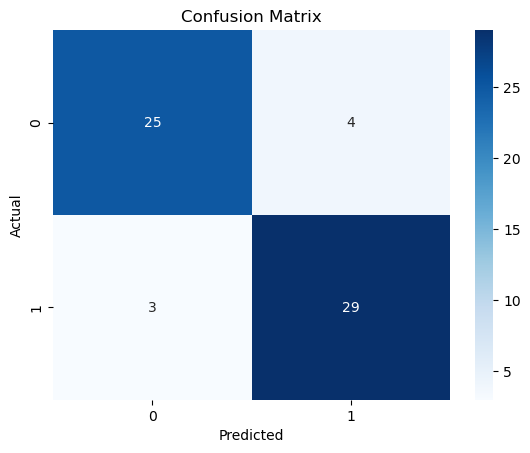

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Ask the Right Questions (Define the Problem)
# Objective: Predict the likelihood of heart failure based on patient data

# Step 2: Obtain Data
file_path = r"C:\Users\parth\Downloads\heart_disease_data (1).csv"
data = pd.read_csv(file_path)

# Step 3: Clean and Explore Data
# Display basic information
display(data.head())
display(data.info())
display(data.describe())

# Checking for missing values
display(data.isnull().sum())

# Visualizing class distribution
sns.countplot(x='target', data=data)
plt.title('Heart Disease Class Distribution')
plt.show()

# Step 4: Model the Data
# Splitting dataset into features and target
X = data.drop(columns=['target'])  # Assuming 'target' is the column to predict
y = data['target']

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning for the best model
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Step 5: Interpret Results
# Predictions
y_pred = best_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 6: Communicate and Take Action
# The model has been optimized using hyperparameter tuning with GridSearchCV for best performance.


In [37]:

import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier  # You can use another model if needed

# Load your dataset
df = pd.read_csv(r"C:\Users\parth\Downloads\heart_disease_data (1).csv")  # Replace with your dataset file

# Select features and target variable (Update column names as per your dataset)
X = df.drop(columns=["target"])  # Drop the target column (Heart Failure)
y = df["target"]  # Target variable

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Scale the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Define and Train the Model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can change the model
model.fit(X_train_scaled, y_train)

# Step 3: Save the Model and Scaler
joblib.dump(model, "heart_failure_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Model and Scaler saved successfully!")


✅ Model and Scaler saved successfully!


In [39]:
import os
print(os.listdir())  # Should show 'heart_failure_model.pkl' and 'scaler.pkl'


['.anaconda', '.cache', '.conda', '.condarc', '.continuum', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.thumbnails', '.virtual_documents', '.vscode', 'anaconda3', 'anaconda_projects', 'ansel', 'AppData', 'Application Data', 'backend', 'Contacts', 'Cookies', 'Documents', 'Downloads', 'dsbalheartfailur.ipynb', 'Favorites', 'heart_failure_model.pkl', 'Links', 'Local Settings', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{3ac00c87-cd0d-11ef-96c1-96ba7ab6f7dc}.TxR.0.regtrans-ms', 'NTUSER.DAT{3ac00c87-cd0d-11ef-96c1-96ba7ab6f7dc}.TxR.1.regtrans-ms', 'NTUSER.DAT{3ac00c87-cd0d-11ef-96c1-96ba7ab6f7dc}.TxR.2.regtrans-ms', 'NTUSER.DAT{3ac00c87-cd0d-11ef-96c1-96ba7ab6f7dc}.TxR.blf', 'NTUSER.DAT{3ac00c88-cd0d-11ef-96c1-96ba7ab6f7dc}.TM.blf', 'NTUSER.DAT{3ac00c88-cd0d-11ef-96c1-96ba7ab6f7dc}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{3ac00c88-cd0d-11ef-96c1-96ba7ab6f7dc}.TMContainer00000000000000000002.regtrans-

In [32]:
import os
print(os.getcwd())  # Prints the current working directory


C:\Users\parth
